<a href="https://colab.research.google.com/github/fmuranda/Python-for-Data-Science-and-Machine-Learning-Essential-Training-Part-1/blob/main/Statistical_Distribution_and_Normality_Analysis_of_Dry_Matter_Components.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

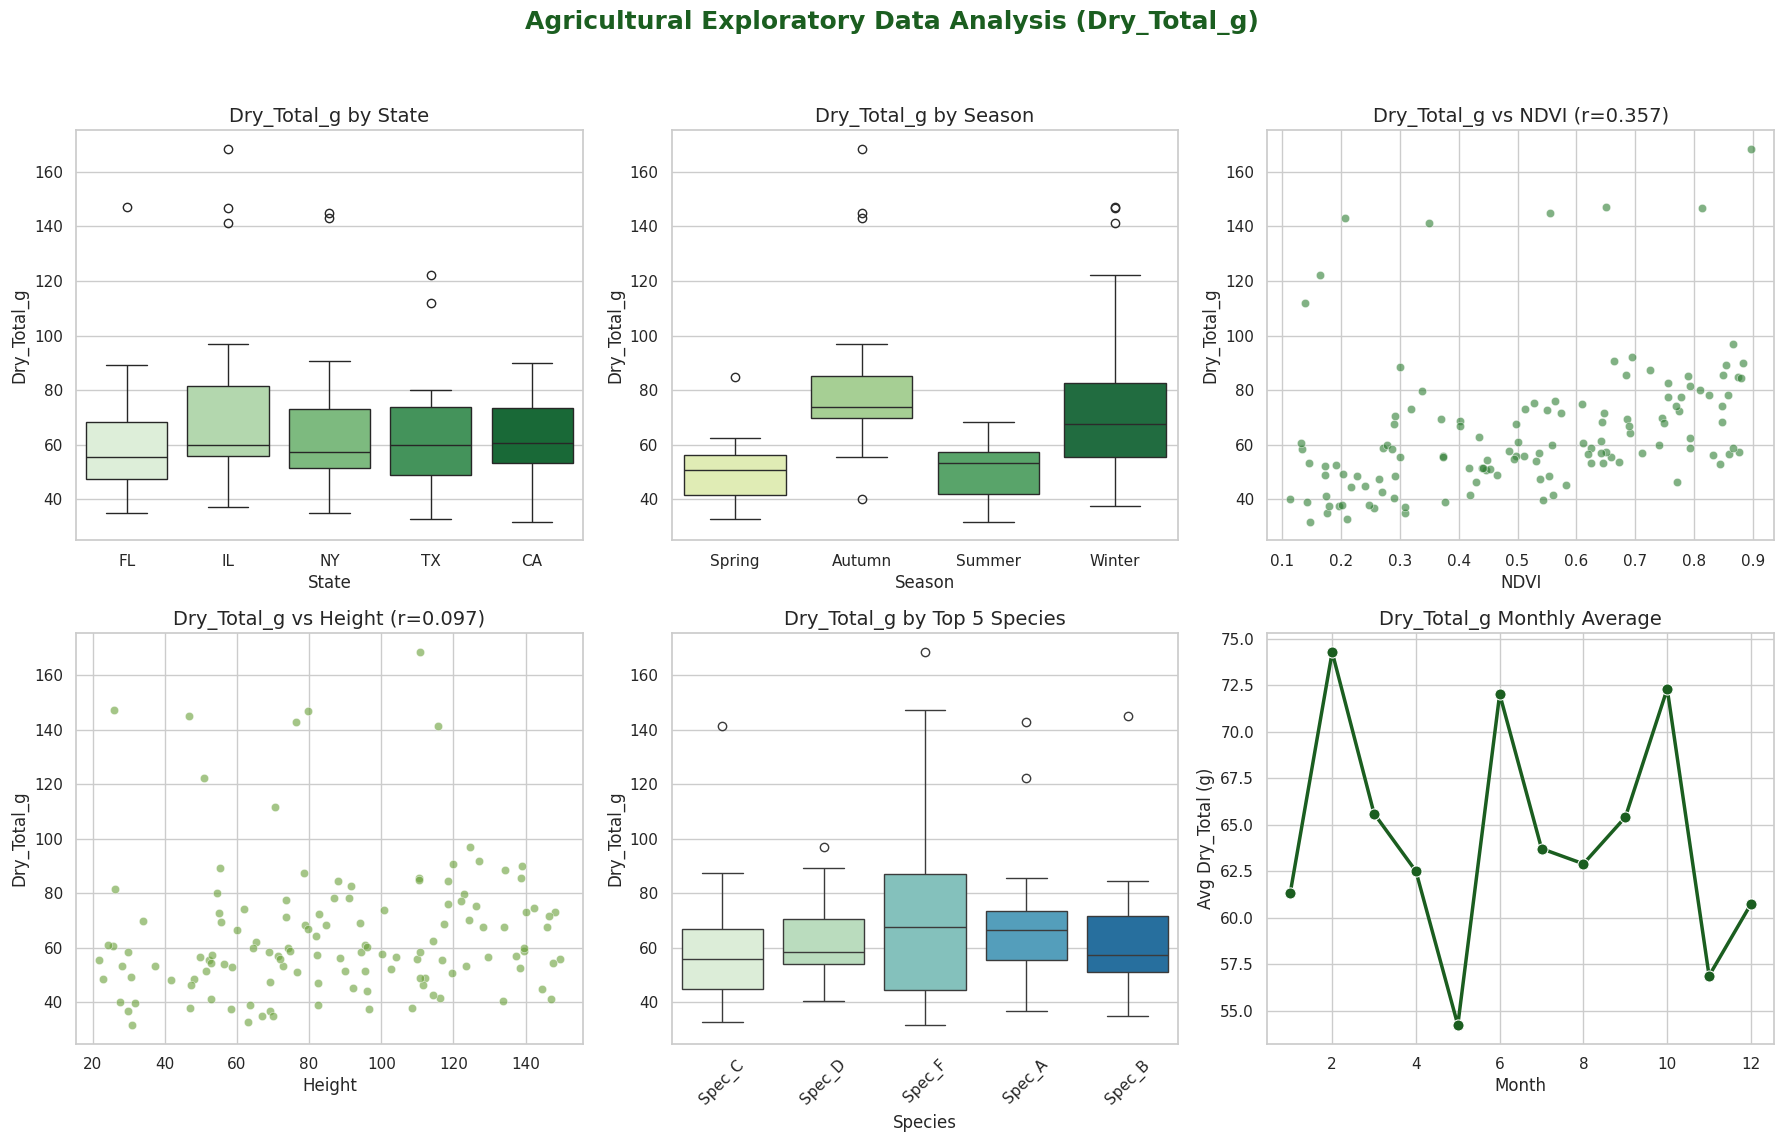

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set a green-themed visual style
sns.set_theme(style="whitegrid")

# Initialize a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Agricultural Exploratory Data Analysis (Dry_Total_g)', fontsize=18, fontweight='bold', color='#1b5e20')

# 1. Dry_Total_g by State (Boxplot) - Using Greens palette
sns.boxplot(ax=axes[0, 0], x='State', y='Dry_Total_g', data=df, palette='Greens', hue='State', legend=False)
axes[0, 0].set_title('Dry_Total_g by State', fontsize=14)

# 2. Dry_Total_g by Season (Colored Boxplot) - Using YlGn palette
sns.boxplot(ax=axes[0, 1], x='Season', y='Dry_Total_g', data=df, palette='YlGn', hue='Season', legend=False)
axes[0, 1].set_title('Dry_Total_g by Season', fontsize=14)

# 3. Dry_Total_g vs NDVI (Scatter Plot) - Dark Green
r_ndvi = df['Dry_Total_g'].corr(df['NDVI']).round(3)
sns.scatterplot(ax=axes[0, 2], x='NDVI', y='Dry_Total_g', data=df, color='#2e7d32', alpha=0.6, edgecolor='w')
axes[0, 2].set_title(f'Dry_Total_g vs NDVI (r={r_ndvi})', fontsize=14)

# 4. Dry_Total_g vs Height (Scatter Plot) - Mid Green
r_height = df['Dry_Total_g'].corr(df['Height']).round(3)
sns.scatterplot(ax=axes[1, 0], x='Height', y='Dry_Total_g', data=df, color='#689f38', alpha=0.6, edgecolor='w')
axes[1, 0].set_title(f'Dry_Total_g vs Height (r={r_height})', fontsize=14)

# 5. Dry_Total_g by Top 5 Species (Boxplot) - Using GnBu palette
sns.boxplot(ax=axes[1, 1], x='Species', y='Dry_Total_g', data=df, palette='GnBu', hue='Species', legend=False)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_title('Dry_Total_g by Top 5 Species', fontsize=14)

# 6. Dry_Total_g Monthly Average (Line Plot) - Forest Green
monthly_avg = df.groupby('Month')['Dry_Total_g'].mean().reset_index()
sns.lineplot(ax=axes[1, 2], x='Month', y='Dry_Total_g', data=monthly_avg, marker='o', color='#1b5e20', linewidth=2.5, markersize=8)
axes[1, 2].set_title('Dry_Total_g Monthly Average', fontsize=14)
axes[1, 2].set_ylabel('Avg Dry_Total (g)')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Define feature matrix X and target vector y
X = df[['NDVI', 'Height', 'State', 'Season']]
y = df['Dry_Total_g']

# 2. Apply one-hot encoding to categorical variables
X_encoded = pd.get_dummies(X, columns=['State', 'Season'], drop_first=True)

# 3. Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 4. Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Generate predictions for the test set
y_pred = model.predict(X_test)

# 6. Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Model Evaluation Results:')
print(f'R-squared Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f} g')


Model Evaluation Results:
R-squared Score: 0.3928
Mean Absolute Error (MAE): 9.9889 g


**Reasoning**:
Generate diagnostic plots (histograms, box plots, Q-Q plots) for biomass components using a green color scheme to visualize distributions and check for normality.



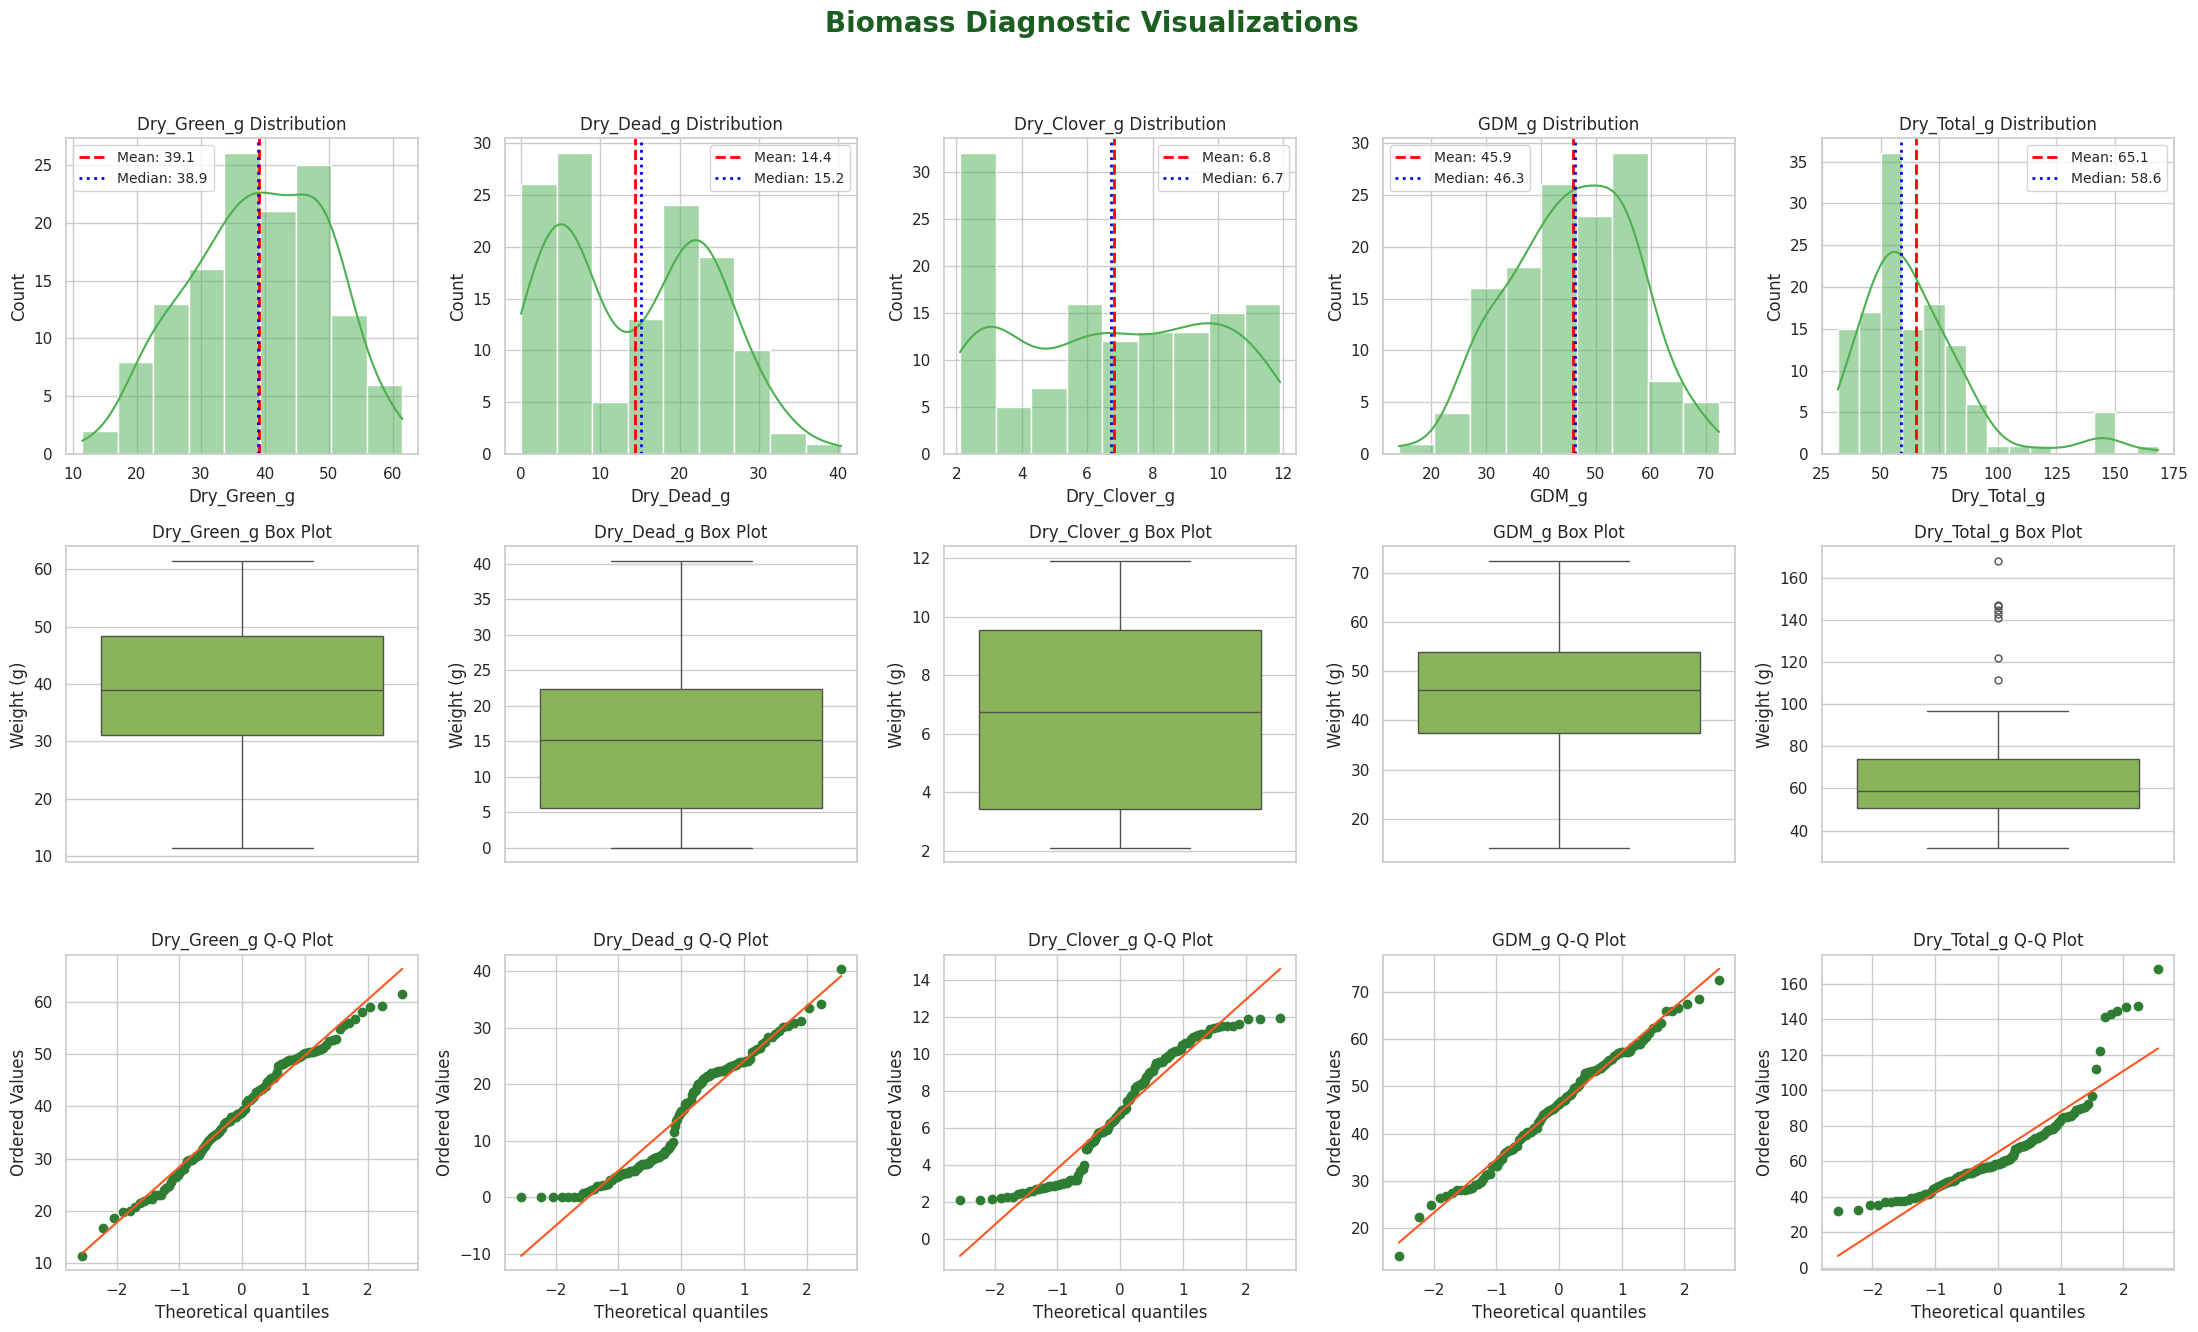

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 1. Define biomass columns
biomass_cols = ['Dry_Green_g', 'Dry_Dead_g', 'Dry_Clover_g', 'GDM_g', 'Dry_Total_g']

# 2. Create a 3x5 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(22, 14))
fig.suptitle('Biomass Diagnostic Visualizations', fontsize=20, fontweight='bold', color='#1b5e20')

for i, col in enumerate(biomass_cols):
    # --- Row 1: Distribution (Histogram) ---
    sns.histplot(df[col], ax=axes[0, i], kde=True, color='#4caf50', edgecolor='white')
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[0, i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    axes[0, i].axvline(median_val, color='blue', linestyle=':', linewidth=2, label=f'Median: {median_val:.1f}')
    axes[0, i].set_title(f'{col} Distribution', fontsize=12)
    axes[0, i].legend(fontsize='small')

    # --- Row 2: Box Plot ---
    sns.boxplot(y=df[col], ax=axes[1, i], color='#8bc34a', fliersize=5)
    axes[1, i].set_title(f'{col} Box Plot', fontsize=12)
    axes[1, i].set_ylabel('Weight (g)')

    # --- Row 3: Q-Q Plot ---
    stats.probplot(df[col], dist="norm", plot=axes[2, i])
    axes[2, i].set_title(f'{col} Q-Q Plot', fontsize=12)
    # Customize Q-Q plot colors
    axes[2, i].get_lines()[0].set_markerfacecolor('#2e7d32')
    axes[2, i].get_lines()[0].set_markeredgecolor('#2e7d32')
    axes[2, i].get_lines()[1].set_color('#ff5722')

# 5 & 6. Final formatting and display
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

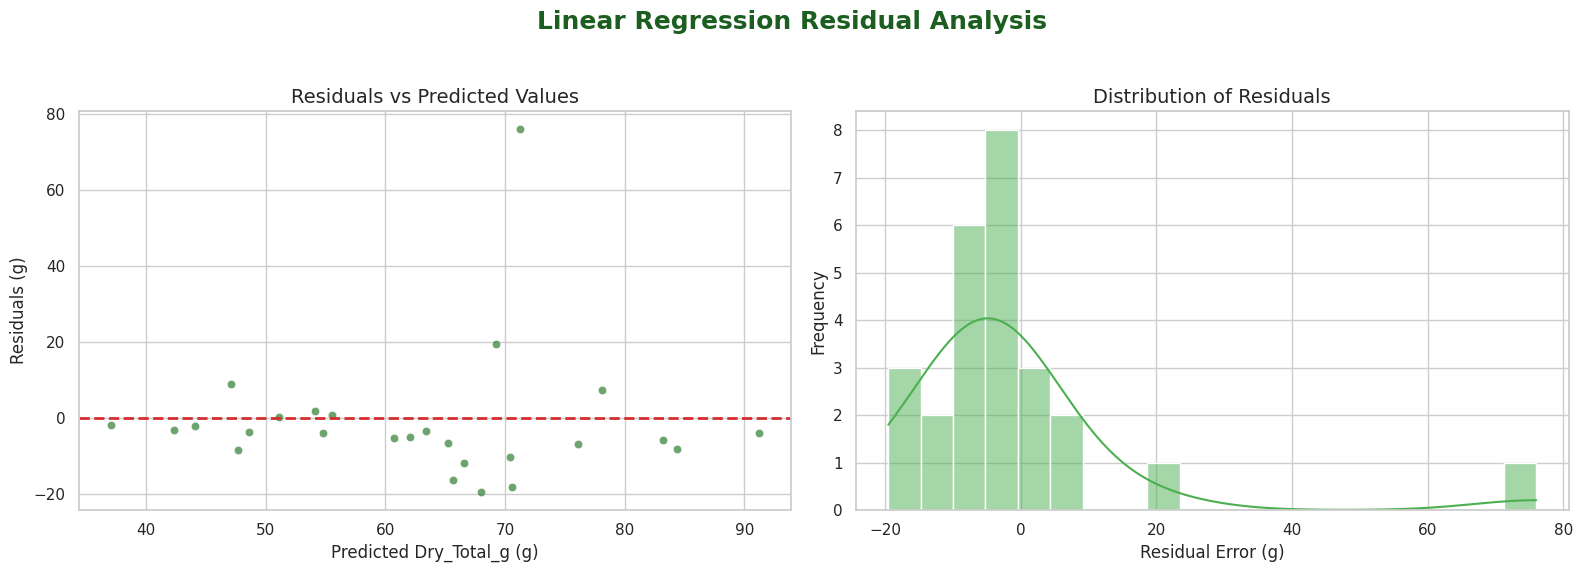

Residuals Mean: -1.2105
Residuals Std Dev: 17.4154


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Calculate residuals
residuals = y_test - y_pred

# 2. Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Linear Regression Residual Analysis', fontsize=18, fontweight='bold', color='#1b5e20')

# 3. Residuals vs Predicted Plot
sns.scatterplot(ax=axes[0], x=y_pred, y=residuals, color='#2e7d32', alpha=0.7)
axes[0].axhline(y=0, color='#d32f2f', linestyle='--', linewidth=2)
axes[0].set_title('Residuals vs Predicted Values', fontsize=14)
axes[0].set_xlabel('Predicted Dry_Total_g (g)', fontsize=12)
axes[0].set_ylabel('Residuals (g)', fontsize=12)

# 4. Distribution of Residuals (Histogram + KDE)
sns.histplot(residuals, ax=axes[1], kde=True, color='#4caf50', edgecolor='white')
axes[1].set_title('Distribution of Residuals', fontsize=14)
axes[1].set_xlabel('Residual Error (g)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# 5. Final adjustments and display
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Summary stats for residuals
print(f'Residuals Mean: {np.mean(residuals):.4f}')
print(f'Residuals Std Dev: {np.std(residuals):.4f}')